In [1]:
import cv2
!pip install supervision
import supervision as sv
import os
!pip install ultralytics
import ultralytics
from ultralytics import YOLO
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 829.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.1/755.1 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
#cap=cv2.VideoCapture("sb-camera1-0805am-0820am.avi")
#SOURCE_VIDEO_PATH="/content/drive/MyDrive/peachtree-camera1-1245pm-0100pm.avi"
#SOURCE_VIDEO_PATH="/content/drive/MyDrive/nb-camera1-0400pm-0415pm.avi"
SOURCE_VIDEO_PATH="/content/drive/MyDrive/lankershim-camera1-0830am-0845am.avi"

In [77]:
MODEL = "yolov8x.pt"
model = YOLO(MODEL)
model.fuse()

YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [78]:
video_info = sv.VideoInfo.from_video_path(video_path=SOURCE_VIDEO_PATH)

video_info

VideoInfo(width=640, height=480, fps=10, total_frames=11220)

In [79]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names

# class_ids of interest - car, motorcycle, bus and truck
selected_classes = [2, 3, 5, 7]

SupervisionWarnings: `track_buffer` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'lost_track_buffer' instead.
SupervisionWarnings: `track_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'track_activation_threshold' instead.
SupervisionWarnings: `match_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'minimum_matching_threshold' instead.


Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=array([], dtype=int64), data={'class_name': array([], dtype='<U5')})
[]


SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


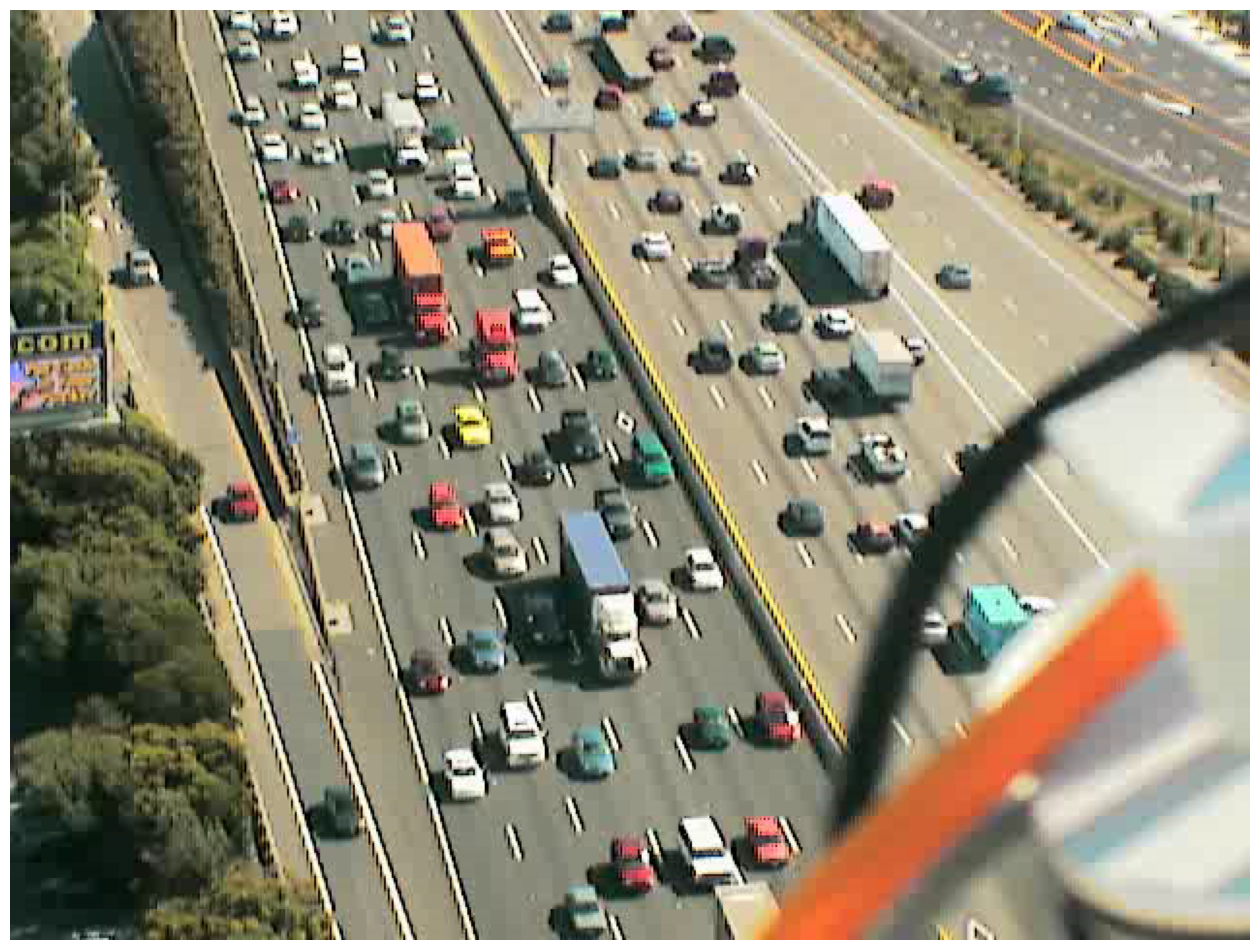

In [33]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=10)
# create instance of BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model.track(frame, tracker="botsort.yaml", verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)
# only consider class id from selected_classes define above
detections = detections[np.isin(detections.class_id, selected_classes)]
detections = byte_tracker.update_with_detections(detections)
print(detections)
print(list(detections.tracker_id))


# annotate and display frame
anotated_frame=box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.plot_image(anotated_frame, (16,16))

In [34]:
detections.xyxy[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=10)
# create instance of BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
i=0
x=[]
y=[]
# model prediction on single frame and conversion to supervision Detections
j = 0
my_coords = {}


for frame in generator:
    print(j)
    if j < 5:
      print(my_coords)
    if j > 5000:
      break
    if True:
      results = model.track(frame, tracker="botsort.yaml", verbose=False)[0]

      # convert to Detections
      detections = sv.Detections.from_ultralytics(results)
      # only consider class id from selected_classes define above

      detections = detections[np.isin(detections.class_id, selected_classes)]

      detections = byte_tracker.update_with_detections(detections)

      '''anotated_frame=box_annotator.annotate(scene=frame, detections=detections)

      %matplotlib inline
      sv.plot_image(anotated_frame, (16,16))'''


      ids = (list(detections.tracker_id))
      for i in range(len(ids)):
        #each object get mid coordinates
        id = ids[i]
        det=detections.xyxy[i]
        x=((det[0]+det[2])/2)
        y=((det[1]+det[3])/2)

        if id not in my_coords:
          my_coords[id] = [(x,y,j)]
        else:
          my_coords[id].append((x,y,j))
    j+=1

SupervisionWarnings: `track_buffer` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'lost_track_buffer' instead.
SupervisionWarnings: `track_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'track_activation_threshold' instead.
SupervisionWarnings: `match_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'minimum_matching_threshold' instead.


0
{}
1
{}
2
{}
3
{}
4
{}
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

In [50]:
final_coords = my_coords.copy()
for key in my_coords.keys():
  final_coords[key] = my_coords[key].copy()

In [51]:
for key in final_coords.keys():
  for i in range(len(final_coords[key])):
    final_coords[key][i] = (key,)+final_coords[key][i]

In [52]:
new_coords = {}
for key in final_coords.keys():
  count = 0
  final = []
  break_or_not = False
  for i in range(len(final_coords[key])):
    prev_count = final_coords[key][i-1][3]
    curr_val = final_coords[key][i][3]
    temp = []
    if curr_val != count:
      prev_x = final_coords[key][i-1][1]
      prev_y = final_coords[key][i-1][2]
      curr_x = final_coords[key][i][1]
      curr_y = final_coords[key][i][2]
      track = 1
      print((i,curr_val,count))
      for j in range(count,curr_val):
        if prev_x > curr_x:
          x = prev_x - ((abs(curr_x-prev_x)/(curr_val-prev_count))*track)
        else:
          x = prev_x + ((abs(curr_x-prev_x)/(curr_val-prev_count))*track)
        if prev_y > curr_y:
          y = prev_y - ((abs(curr_y-prev_y)/(curr_val-prev_count))*track)
        else:
          y = prev_y+ ((abs(curr_y-prev_y)/(curr_val-prev_count))*track)
        track+=1
        temp.append((key,x,y,j))
      print(temp)
      temp.append((key,final_coords[key][i][1],final_coords[key][i][2],final_coords[key][i][3]))
      count = curr_val+1
      final+=temp
    else:
      count+=1
      final.append((key,final_coords[key][i][1],final_coords[key][i][2],final_coords[key][i][3]))
  if not break_or_not:
    new_coords[key] = final


(1, 2, 1)
[(590, 236.50865936279297, 399.48455810546875, 1)]
(1, 2, 1)
[(593, 363.62091064453125, 437.1702880859375, 1)]
(0, 6, 0)
[(603, nan, nan, 0), (603, nan, nan, 1), (603, nan, nan, 2), (603, nan, nan, 3), (603, nan, nan, 4), (603, nan, nan, 5)]
(0, 9, 0)
[(608, 385.3159216678504, 53.872893593528055, 0), (608, 384.2588269782789, 52.41100935502486, 1), (608, 383.2017322887074, 50.949125116521664, 2), (608, 382.1446375991359, 49.48724087801847, 3), (608, 381.0875429095644, 48.025356639515266, 4), (608, 380.0304482199929, 46.56347240101208, 5), (608, 378.9733535304214, 45.101588162508875, 6), (608, 377.9162588408499, 43.63970392400568, 7), (608, 376.85916415127843, 42.177819685502485, 8)]
(2, 13, 11)
[(608, 417.8167317708333, 96.99372863769531, 11), (608, 416.4590250651042, 95.56599426269531, 12)]
(9, 26, 20)
[(608, 407.9857918875558, 84.95017569405692, 20), (608, 406.8626970563616, 83.03192029680524, 21), (608, 405.7396022251674, 81.11366489955357, 22), (608, 404.6165073939732, 79.

(4, 248, 245)
[(1022, 350.8414611816406, 405.01075744628906, 245), (1022, 350.9403076171875, 405.1808166503906, 246), (1022, 351.0391540527344, 405.3508758544922, 247)]
(5, 252, 249)
[(1022, 351.26438903808594, 406.19942474365234, 249), (1022, 351.3907775878906, 406.87791442871094, 250), (1022, 351.5171661376953, 407.55640411376953, 251)]
(6, 254, 253)
[(1022, 351.78993225097656, 408.8081970214844, 253)]
(8, 257, 256)
[(1022, 352.0474853515625, 410.70933532714844, 256)]
(14, 267, 263)
[(1022, 353.2842163085937, 414.59039306640625, 263), (1022, 353.03651123046876, 415.17486572265625, 264), (1022, 352.78880615234374, 415.75933837890625, 265), (1022, 352.5411010742188, 416.34381103515625, 266)]
(17, 273, 270)
[(1022, 354.2621612548828, 418.7231140136719, 270), (1022, 354.4188537597656, 419.28753662109375, 271), (1022, 354.57554626464844, 419.8519592285156, 272)]
(18, 276, 274)
[(1022, 355.1101481119792, 420.9487711588542, 274), (1022, 355.48805745442706, 421.4811604817708, 275)]
(19, 278,

In [39]:
from scipy.spatial import distance

In [53]:
new_coords

{590: [(590, 235.20608520507812, 396.70001220703125, 0),
  (590, 236.50865936279297, 399.48455810546875, 1),
  (590, 237.8112335205078, 402.26910400390625, 2)],
 591: [(591, 316.736572265625, 324.457763671875, 0)],
 592: [(592, 387.41845703125, 177.593505859375, 0)],
 593: [(593, 362.8846130371094, 435.46405029296875, 0),
  (593, 363.62091064453125, 437.1702880859375, 1),
  (593, 364.3572082519531, 438.87652587890625, 2)],
 603: [(603, nan, nan, 0),
  (603, nan, nan, 1),
  (603, nan, nan, 2),
  (603, nan, nan, 3),
  (603, nan, nan, 4),
  (603, nan, nan, 5),
  (603, 502.8135681152344, 307.1062927246094, 6)],
 608: [(608, 385.3159216678504, 53.872893593528055, 0),
  (608, 384.2588269782789, 52.41100935502486, 1),
  (608, 383.2017322887074, 50.949125116521664, 2),
  (608, 382.1446375991359, 49.48724087801847, 3),
  (608, 381.0875429095644, 48.025356639515266, 4),
  (608, 380.0304482199929, 46.56347240101208, 5),
  (608, 378.9733535304214, 45.101588162508875, 6),
  (608, 377.9162588408499,

In [54]:
import math
for key in new_coords.keys():
  x = new_coords[key]
  new_coords[key] = [t for t in x if not any(isinstance(n, float) and math.isnan(n) for n in t)]

In [55]:
for key in new_coords.keys():
  for i in range(1,len(new_coords[key])):
    (p_x,p_y) = (new_coords[key][i-1][1],new_coords[key][i-1][2])
    (x,y) = (new_coords[key][i][1],new_coords[key][i][2])
    new_coords[key][i] = new_coords[key][i]+(distance.euclidean((p_x,p_y),(x,y)),)

In [57]:
for key in new_coords.keys():
  print(key,len(new_coords[key]))

590 3
591 1
592 1
593 3
603 1
608 43
610 12
625 28
621 22
624 1
634 70
633 31
638 31
647 42
667 69
674 80
673 79
693 72
694 69
699 65
706 71
721 121
729 85
730 83
743 1
753 1
757 98
760 107
763 122
764 110
772 1
774 112
800 122
805 125
810 129
816 129
821 142
823 165
829 140
827 136
834 186
832 139
831 198
847 165
854 145
855 1
858 149
863 1
862 156
871 187
879 169
882 162
891 163
890 223
892 163
911 169
909 169
922 176
934 186
940 1
945 198
949 190
951 1
955 285
956 186
958 186
971 198
982 209
981 214
983 211
988 1
987 262
993 234
992 239
1004 234
1008 363
1009 223
1012 239
1017 239
1022 323
1024 1
1039 258
1053 323
1056 286
1071 1
1077 350
1085 438
1088 319
1092 323
1089 337
1097 1
1111 338
1110 334
1117 1
1122 337
1121 337
1133 366
1136 374
1137 399
1153 411
1152 383
1158 387
1164 399
1175 410
1181 407
1182 407
1190 479
1204 1
1207 546
1212 561
1210 463
1216 495
1218 505
1234 502
1243 544
1254 497
1257 499
1270 513
1274 1
1292 523
1303 561
1309 555
1317 551
1320 561


In [58]:
new_coords

{590: [(590, 235.20608520507812, 396.70001220703125, 0),
  (590, 236.50865936279297, 399.48455810546875, 1, 3.0741495241532477),
  (590, 237.8112335205078, 402.26910400390625, 2, 3.0741495241532477)],
 591: [(591, 316.736572265625, 324.457763671875, 0)],
 592: [(592, 387.41845703125, 177.593505859375, 0)],
 593: [(593, 362.8846130371094, 435.46405029296875, 0),
  (593, 363.62091064453125, 437.1702880859375, 1, 1.8583276279628542),
  (593, 364.3572082519531, 438.87652587890625, 2, 1.8583276279628542)],
 603: [(603, 502.8135681152344, 307.1062927246094, 6)],
 608: [(608, 385.3159216678504, 53.872893593528055, 0),
  (608, 384.2588269782789, 52.41100935502486, 1, 1.80403844457493),
  (608, 383.2017322887074, 50.949125116521664, 2, 1.80403844457493),
  (608, 382.1446375991359, 49.48724087801847, 3, 1.80403844457493),
  (608, 381.0875429095644, 48.025356639515266, 4, 1.8040384445749358),
  (608, 380.0304482199929, 46.56347240101208, 5, 1.8040384445749242),
  (608, 378.9733535304214, 45.10158

In [72]:
import pandas as pd
full_array = []
for key in [831]:
  temp = new_coords[key]
  print(key,len(temp))
  temp = temp[1:]
  full_array+=temp

831 198


In [73]:
full_array

[(831, 341.05540613974296, 316.97168067193803, 1, 1.2132641510999427),
 (831, 341.5527137018019, 318.0783400997039, 2, 1.2132641510998674),
 (831, 342.0500212638609, 319.18499952746976, 3, 1.2132641510998907),
 (831, 342.54732882591986, 320.2916589552356, 4, 1.2132641510998674),
 (831, 343.0446363879788, 321.39831838300154, 5, 1.2132641510999194),
 (831, 343.5419439500378, 322.5049778107674, 6, 1.2132641510998907),
 (831, 344.03925151209677, 323.61163723853326, 7, 1.2132641510998674),
 (831, 344.5365590741557, 324.7182966662991, 8, 1.2132641510998674),
 (831, 345.0338666362147, 325.82495609406504, 9, 1.2132641510999427),
 (831, 345.5311741982737, 326.9316155218309, 10, 1.2132641510998674),
 (831, 346.0284817603327, 328.03827494959677, 11, 1.2132641510998907),
 (831, 346.52578932239163, 329.14493437736263, 12, 1.2132641510998674),
 (831, 347.0230968844506, 330.25159380512855, 13, 1.2132641510999194),
 (831, 347.5204044465096, 331.3582532328944, 14, 1.2132641510998907),
 (831, 348.017712

In [74]:
a = np.asarray(full_array)
df = pd.DataFrame(a)
df = df.drop(columns=[0,3])
df = df.rename(columns={ 1: "x", 2: "y", 4: "vel"})
df

x           y       vel
0    341.055406  316.971681  1.213264
1    341.552714  318.078340  1.213264
2    342.050021  319.185000  1.213264
3    342.547329  320.291659  1.213264
4    343.044636  321.398318  1.213264
..          ...         ...       ...
192  337.551921  309.191416  1.526542
193  338.179138  310.583153  1.526542
194  338.806356  311.974889  1.526542
195  339.433573  313.366625  1.526542
196  340.060791  314.758362  1.526542

[197 rows x 3 columns]

In [75]:
df.to_csv("final_I80_single.csv",header=['x','y','vel'])
#df.to_csv("final_101_single.csv",header=['x','y','vel'])
#df.to_csv("final_Peach_single.csv",header=['x','y','vel'])
#df.to_csv("final_LB_single.csv",header=['x','y','vel'])
